1D Output example

In [7]:
import numpy as np
import matplotlib.pyplot as plt

import pickle
three_d_folder = ""
two_d_folder = ""


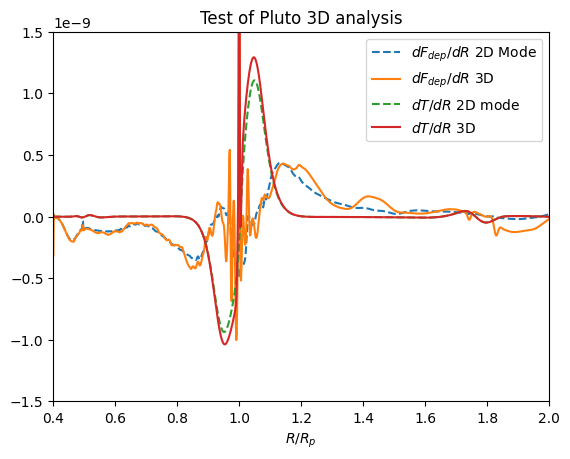

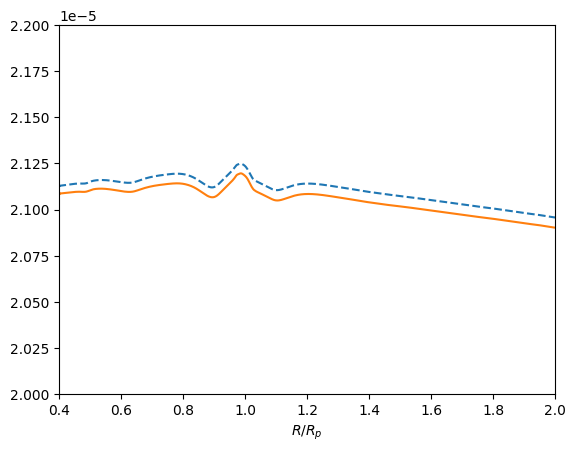

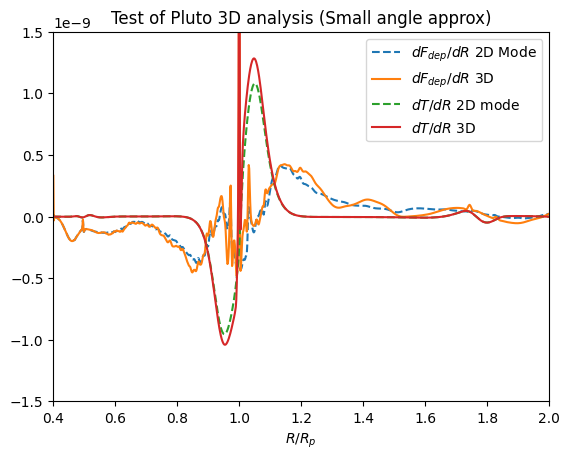

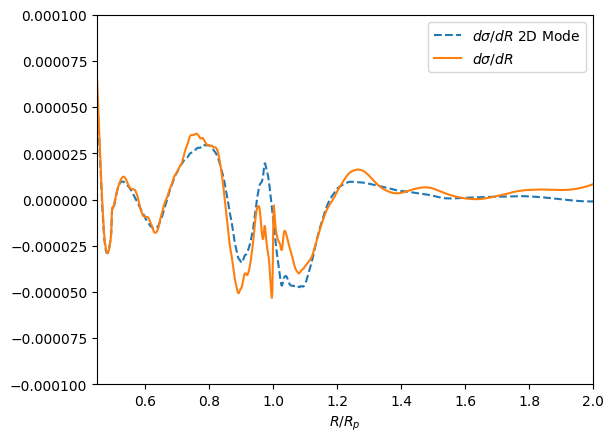

In [23]:

data3 = pickle.load(open('test_data/3D_pluto_test/1D_orbit_10.p', 'rb'))

plt.title('Test of Pluto 3D analysis')

plt.plot(data3['R'], data3['dF_depdR_2D'], '--', label='$dF_{dep}/dR$ 2D Mode')
plt.plot(data3['R'], data3['dF_depdR'], label='$dF_{dep}/dR$ 3D')

plt.plot(data3['R'], data3['dTdR_2D'], '--', label='$dT/dR$ 2D mode')
plt.plot(data3['R'], data3['dTdR'], label='$dT/dR$ 3D')

plt.ylim([-1.5e-9, 1.5e-9])
plt.xlim([0.4, 2])
plt.xlabel("$R/R_p$")
plt.legend()

plt.figure()
plt.plot(data3['R'], data3['surface_density_1D'], '--', label='$\Sigma$')


data4 = pickle.load(open('test_data/3D_pluto_test/1D_orbit_10_spherical_integration.p', 'rb'))

plt.plot(data4['R'], data4['surface_density_1D'], label='$\Sigma$ (small angle approximation)')

data3 = data4

plt.ylim([2e-5, 2.2e-5])
plt.xlim([0.4, 2])
plt.xlabel("$R/R_p$")



plt.figure()
plt.title('Test of Pluto 3D analysis (Small angle approx)')

plt.plot(data3['R'], data3['dF_depdR_2D'], '--', label='$dF_{dep}/dR$ 2D Mode')
plt.plot(data3['R'], data3['dF_depdR'], label='$dF_{dep}/dR$ 3D')

plt.plot(data3['R'], data3['dTdR_2D'], '--', label='$dT/dR$ 2D mode')
plt.plot(data3['R'], data3['dTdR'], label='$dT/dR$ 3D')

plt.ylim([-1.5e-9, 1.5e-9])
plt.xlim([0.4, 2])
plt.xlabel("$R/R_p$")
plt.legend()


plt.figure()
plt.plot(data3['R'], data3['dsigmadt_2D'], '--', label='$d\sigma/dR$ 2D Mode')
plt.plot(data3['R'], data3['dsigmadt'], label='$d\sigma/dR$')

plt.ylim([-10e-5, 10e-5])
plt.xlim([0.45, 2])
plt.xlabel("$R/R_p$")
plt.legend()


Run the below on your server to generate the files required for this code

```
from disc_planet.pluto import Pluto3DSimulation, Pluto2DSimulation
import gc # force garbage collection more often


three_d_folder = ""
two_d_folder = ""

orbits = [0, 10, 11]

for o in orbits:
    new_orbit = Pluto3DSimulation(three_d_folder, 10)
    summary = new_orbit.process_summary_outputs()
    new_orbit.save_1d()
    del new_orbit
    gc.collect()

    new_orbit = Pluto3DSimulation(two_d_folder, 10)
    summary = new_orbit.process_summary_outputs()
    new_orbit.save_1d()

    del new_orbit
    gc.collect()

```

In [ ]:
data3d = pickle.load(open(f'{three_d_folder}1D_orbit_10.p', 'rb'))
data2d = pickle.load(open(f'{three_d_folder}1D_orbit_10.p', 'rb'))

fig, axes = plt.subplots(2, 2, sharex=True, sharey='col')
axes = np.ravel(axes)
plt.xlim([0.5, 1.5])

axes = np.ravel(axes)

axes[0].plot(data2d['R'], data2d['dTdR_2D'], color='C0', label='2D Data')
axes[0].plot(data3d['R'], data3d['dTdR'], color='C1', label='3D Data')
l_i = 0
axs[l_i].text(0.02, 0.9, f"({string.ascii_lowercase[l_i]}) $dT/dR$ Torque Excitation", transform=axs[l_i].transAxes)

axes[1].plot(data2d['R'], data2d['dF_depdR_2D'], color='C0', label='2D Data')
axes[1].plot(data3d['R'], data3d['dF_depdR'], color='C1', label='3D Data')

l_i = 1
axs[l_i].text(0.02, 0.9, f"({string.ascii_lowercase[l_i]}) $dF_dep/dR$ Torque Deposition", transform=axs[l_i].transAxes)

axes[0].set_ylabel('Torque')

# Torque and F_dep
data3d_bg = pickle.load(open(f'{three_d_folder}1D_orbit_0.p', 'rb'))
data3d_after = pickle.load(open(f'{three_d_folder}1D_orbit_11.p', 'rb'))

data2d_bg = pickle.load(open(f'{two_d_folder}1D_orbit_0.p', 'rb'))
data2d_after = pickle.load(open(f'{two_d_folder}1D_orbit_11.p', 'rb'))

axes[2].plot(data2d['R'], (data2d_after['surface_density_1D'] - data2d['surface_density_1D'])/(
    data2d_bg['surface_density_1D'] * (data2d_after['time'] - data2d['time'])), color='C1', label='2D Data')
axes[2].plot(data3d['R'], (data3d_after['surface_density_1D'] - data3d['surface_density_1D'])/(
    data3d_bg['surface_density_1D'] * (data3d_after['time'] - data3d['time'])), color='C1', label='3D Data')
axes[2].set_ylabel('$ d/dt (\Sigma/\Sigma_0)$')

l_i = 2
axs[l_i].text(0.02, 0.9, f"({string.ascii_lowercase[l_i]}) Measured surface density evolution", transform=axs[l_i].transAxes)

axes[3].plot(data2d['R'], data2d['dsigmadt_2D'], color='C0', label='2D Data')
axes[3].plot(data3d['R'], data3d['dsigmadt'], color='C1', label='3D Data')
l_i = 3
axs[l_i].text(0.02, 0.9, f"({string.ascii_lowercase[l_i]}) Theoretical surface density evolution", transform=axs[l_i].transAxes)

axes[2].set_xlabel("$R/R_p$")
axes[3].set_xlabel("$R/R_p$")
plt.legend()